In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #vẽ biểu đồ
#!pip install --upgrade scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
!pip install openpyxl --upgrade #để xử lý file excel
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/outlad(gop)/39week'

/content/drive/MyDrive/Colab Notebooks/outlad(gop)/39week


# Đọc dữ liệu

In [ ]:
df_weekly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/outlad(gop)/39week/sum_click_by_activity_by_week(final_result).csv')
df_weekly.head()

,code_module,code_presentation,id_student,week,dataplus,dualpane,externalquiz,folder,forumng,glossary,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,AAA,2013J,11391,0,0,0,0,0,17,0,...,0,0,0,0,0,3,0,11,0,Pass
1,AAA,2013J,11391,1,0,0,0,0,3,0,...,0,0,0,0,0,5,0,8,1,Pass
2,AAA,2013J,11391,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Pass
3,AAA,2013J,11391,3,0,0,0,0,35,0,...,0,0,0,0,0,1,0,1,0,Pass
4,AAA,2013J,11391,5,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,Pass


# Tiền xử lý dữ liệu

In [ ]:
#Loại bỏ các mẫu dữ liệu nhãn "withdrawn"
df_filtered = df_weekly[df_weekly['final_result'].isin(['Pass', 'Distinction', 'Fail'])].reset_index(drop=True)
df_filtered.head()

,code_module,code_presentation,id_student,week,dataplus,dualpane,externalquiz,folder,forumng,glossary,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,AAA,2013J,11391,0,0,0,0,0,17,0,...,0,0,0,0,0,3,0,11,0,Pass
1,AAA,2013J,11391,1,0,0,0,0,3,0,...,0,0,0,0,0,5,0,8,1,Pass
2,AAA,2013J,11391,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Pass
3,AAA,2013J,11391,3,0,0,0,0,35,0,...,0,0,0,0,0,1,0,1,0,Pass
4,AAA,2013J,11391,5,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,Pass


In [ ]:
df_filtered['final_result'] = df_filtered['final_result'].replace('Distinction', 'Pass')

In [ ]:
data = df_filtered[df_filtered['week'] >= 1]

In [ ]:

# Tạo mã phiên học bằng cách ghép 'code_module','code_presentation'  và 'id_student'
data['session_id'] = data['code_module'].astype(str) + '_' + data['code_presentation'].astype(str)+ '_' + data['id_student'].astype(str)

# Chuyển đổi 'session_id' thành dạng số, đảm bảo các session_id giống nhau có cùng mã
data['session_id_numeric'] = data['session_id'].astype('category').cat.codes

 #Loại bỏ hai cột 'code_module', 'code_presentation','id_student','session_id'
data = data.drop(['code_module', 'code_presentation','id_student','session_id'], axis=1)

<ipython-input-8-1c77c877375d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['session_id'] = data['code_module'].astype(str) + '_' + data['code_presentation'].astype(str)+ '_' + data['id_student'].astype(str)
<ipython-input-8-1c77c877375d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['session_id_numeric'] = data['session_id'].astype('category').cat.codes


In [ ]:
data['final_result'] = data['final_result'].replace({'Pass': 0, 'Fail': 1})
data

<ipython-input-9-ef0b001bbd2f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['final_result'] = data['final_result'].replace({'Pass': 0, 'Fail': 1})


,week,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result,session_id_numeric
1,1,0,0,0,0,3,0,13,0,0,...,0,0,0,0,5,0,8,1,0,11
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,11
3,3,0,0,0,0,35,0,11,0,0,...,0,0,0,0,1,0,1,0,0,11
4,5,0,0,0,0,2,0,10,0,0,...,0,0,0,0,0,0,1,0,0,11
5,6,0,0,0,0,23,0,6,0,0,...,0,0,0,0,0,0,1,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562356,23,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,1,0,0,21400
562357,25,0,0,0,0,0,0,2,0,0,...,0,0,13,0,0,0,0,0,0,21400
562358,28,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,21400
562359,30,0,0,0,0,0,0,8,0,0,...,0,0,15,0,4,0,0,0,0,21400


In [ ]:
data = data.sort_values(by=['session_id_numeric', 'week'])
data

,week,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result,session_id_numeric
708,1,0,0,0,0,10,0,10,0,1,...,0,0,0,0,0,0,5,2,0,0
709,2,0,0,0,0,3,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
710,3,0,0,0,0,6,0,11,0,0,...,0,0,0,0,0,0,9,6,0,0
711,4,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,1,1,0,0
712,5,3,0,0,0,5,0,19,0,0,...,0,0,0,0,2,0,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561785,16,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,21956
561786,20,0,0,0,0,0,0,3,0,0,...,0,0,0,0,2,0,6,0,1,21956
561787,25,0,0,0,0,0,0,6,0,0,...,0,0,16,0,0,0,5,0,1,21956
561788,26,0,0,0,0,0,0,3,0,0,...,0,0,0,0,6,0,4,0,1,21956


# Chuyển sang dữ liệu 3D

In [ ]:
# Bước 2: Xác định các session ID và tuần duy nhất
session_ids = data['session_id_numeric'].unique()
weeks = data['week'].unique()

# Bước 3: Xác định các cột hoạt động (loại bỏ các cột không phải là hoạt động)
activity_columns = data.columns[1:-2]

# Bước 4: Khởi tạo mảng 3D với kích thước (số lượng session, số tuần, số hoạt động)
num_sessions = len(session_ids)
num_weeks = len(weeks)
num_activities = len(activity_columns)
data_3d = np.zeros((num_sessions, num_weeks, num_activities))

# Bước 5: Sử dụng từ điển để lưu trữ chỉ mục session và tuần
session_index_map = {session_id: idx for idx, session_id in enumerate(session_ids)}
week_index_map = {week: idx for idx, week in enumerate(weeks)}

# Bước 6: Chuyển dữ liệu sang mảng 3D bằng cách sử dụng từ điển và numpy indexing
for row in data.itertuples(index=False):
    session_id = row.session_id_numeric
    week = row.week
    if session_id in session_index_map and week in week_index_map:
        session_idx = session_index_map[session_id]
        week_idx = week_index_map[week]
        data_3d[session_idx, week_idx, :] = np.array(row[1:-2])

# Kết quả: Mảng 3D với kích thước (num_sessions, num_weeks, num_activities)
print("Shape of the 3D array:", data_3d.shape)

Shape of the 3D array: (21957, 39, 20)


In [ ]:
final_results = data.groupby('session_id_numeric')['final_result'].last().values
final_results.shape

(21957,)

# Chuẩn hóa dữ liệu

In [ ]:
num_sessions, num_weeks, num_activities = data_3d.shape
data_2d_reshaped = data_3d.reshape(data_3d.shape[0], -1)  # Chuyển về dạng 2D để chuẩn hóa

# Sử dụng MinMaxScaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_2d_scaled = scaler.fit_transform(data_2d_reshaped)

# Chuyển đổi lại thành mảng 3D sau khi chuẩn hóa
data_3d_normalized = data_2d_scaled.reshape(num_sessions, num_weeks, num_activities)

In [ ]:
data_3d_normalized.shape

(21957, 39, 20)

In [ ]:
X = data_3d_normalized  # Dữ liệu đầu vào đã chuẩn hóa
y = final_results  # Nhãn ở dạng số nguyên


# Resampling


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [ ]:
# hàm xác định các phần tử nhiễu và xóa
from sklearn.neighbors import NearestNeighbors
def remove_noise_class0(data, labels, m):

    # Tạo mô hình K-Nearest Neighbors
    knn = NearestNeighbors(n_neighbors=m + 1)  # +1 vì điểm dữ liệu tự là láng giềng của chính nó
    knn.fit(data)

    # Tìm các láng giềng gần nhất
    neighbors = knn.kneighbors(data, return_distance=False)

    # Danh sách các điểm giữ lại
    keep_indices = []

    for i, point_neighbors in enumerate(neighbors):
        # Bỏ qua chính điểm đó (index 0)
        neighbor_labels = labels[point_neighbors[1:]]

        if labels[i] == 0:  # Chỉ kiểm tra với lớp 0
            count_class_0 = np.sum(neighbor_labels == 0)
            count_class_1 = np.sum(neighbor_labels == 1)

            # Điều kiện để loại bỏ nhiễu hoặc biên
            if count_class_1 <m:  # Là nhiễu
              keep_indices.append(i)
        else:
            # Giữ lại tất cả các điểm lớp 1
            keep_indices.append(i)

    # Tạo dữ liệu mới sau khi loại bỏ nhiễu
    return data[keep_indices], labels[keep_indices]



In [ ]:
def remove_noise_class1(data, labels, m):

    # Tạo mô hình K-Nearest Neighbors
    knn = NearestNeighbors(n_neighbors=m + 1)  # +1 vì điểm dữ liệu tự là láng giềng của chính nó
    knn.fit(data)

    # Tìm các láng giềng gần nhất
    neighbors = knn.kneighbors(data, return_distance=False)

    # Danh sách các điểm giữ lại
    keep_indices = []

    for i, point_neighbors in enumerate(neighbors):
        # Bỏ qua chính điểm đó (index 0)
        neighbor_labels = labels[point_neighbors[1:]]

        if labels[i] == 1:  # Chỉ kiểm tra với lớp 0
            count_class_0 = np.sum(neighbor_labels == 0)
            count_class_1 = np.sum(neighbor_labels == 1)

            # Điều kiện để loại bỏ nhiễu hoặc biên
            if count_class_0 <m:  # Là nhiễu
              keep_indices.append(i)
        else:
            # Giữ lại tất cả các điểm lớp 1
            keep_indices.append(i)

    # Tạo dữ liệu mới sau khi loại bỏ nhiễu
    return data[keep_indices], labels[keep_indices]

In [ ]:
#Xóa nhiễu lớp 0
X_clean0, y_clean0 = remove_noise_class0(data_2d_scaled, y, m=3)

print("Dữ liệu sau khi xóa phần tử nhiễu và biên:")
print(X_clean0.shape)
print(y_clean0.shape)

Dữ liệu sau khi xóa phần tử nhiễu và biên:
(20708, 780)
(20708,)


In [ ]:
#Xóa nhiễu lớp 1
X_clean1, y_clean1 = remove_noise_class1(data_2d_scaled, y, m=3)

print("Dữ liệu sau khi xóa phần tử nhiễu và biên:")
print(X_clean1.shape)
print(y_clean1.shape)

Dữ liệu sau khi xóa phần tử nhiễu và biên:
(21303, 780)
(21303,)


In [ ]:
#Xóa nhiễu lớp 0, 1
X_clean, y_clean = remove_noise_class1(X_clean0, y_clean0, m=3)

print("Dữ liệu sau khi xóa phần tử nhiễu và biên:")
print(X_clean.shape)
print(y_clean.shape)

Dữ liệu sau khi xóa phần tử nhiễu và biên:
(20113, 780)
(20113,)


In [ ]:
#resamping bằng SMOTE
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y_clean0))
X_res_SMOTEBORER0, y_res_SMOTEBORDER0 = sm.fit_resample(X_clean0, y_clean0)
print('Resampled dataset shape %s' % Counter(y_res_SMOTEBORDER0))
# Chuyển đổi lại thành mảng 3D sau khi chuẩn hóa
X_3d_SMOTEBORER0 = X_res_SMOTEBORER0.reshape(len(X_res_SMOTEBORER0), num_weeks, num_activities)

Original dataset shape Counter({0: 14133, 1: 6575})
Resampled dataset shape Counter({0: 14133, 1: 14133})


In [ ]:
# Lần đầu đã chạy với xóa nhiễu lớp 0 sau đó xóa cả 2 lớp
#resamping bằng SMOTE
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y_clean))
X_res_SMOTEBORER, y_res_SMOTEBORDER = sm.fit_resample(X_clean, y_clean)
print('Resampled dataset shape %s' % Counter(y_res_SMOTEBORDER))
# Chuyển đổi lại thành mảng 3D sau khi chuẩn hóa
X_3d_SMOTEBORER = X_res_SMOTEBORER.reshape(len(X_res_SMOTEBORER), num_weeks, num_activities)

Original dataset shape Counter({0: 14133, 1: 5980})
Resampled dataset shape Counter({0: 14133, 1: 14133})


In [ ]:
#resamping bằng SMOTE
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y_clean1))
X_res_SMOTEBORER1, y_res_SMOTEBORDER1 = sm.fit_resample(X_clean1, y_clean1)
print('Resampled dataset shape %s' % Counter(y_res_SMOTEBORDER1))
# Chuyển đổi lại thành mảng 3D sau khi chuẩn hóa
X_3d_SMOTEBORER1 = X_res_SMOTEBORER1.reshape(len(X_res_SMOTEBORER1), num_weeks, num_activities)

Original dataset shape Counter({0: 15382, 1: 5921})
Resampled dataset shape Counter({0: 15382, 1: 15382})


# Tách Train/test


In [ ]:
X_smb0_train, X_smb0_test, y_smb0_train, y_smb0_test = train_test_split(X_3d_SMOTEBORER0, y_res_SMOTEBORDER0,stratify=y_res_SMOTEBORDER0, test_size=0.25)

In [ ]:
X_smb_train, X_smb_test, y_smb_train, y_smb_test = train_test_split(X_3d_SMOTEBORER, y_res_SMOTEBORDER,stratify=y_res_SMOTEBORDER, test_size=0.25)

In [ ]:
X_smb1_train, X_smb1_test, y_smb1_train, y_smb1_test = train_test_split(X_3d_SMOTEBORER1, y_res_SMOTEBORDER1,stratify=y_res_SMOTEBORDER1, test_size=0.25)

# LSTM

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# LSTM - SMOTE remove border

In [ ]:
# Bước 4: Xây dựng mô hình LSTM với 4 lớp
model_smb = Sequential()

# Lớp LSTM thứ 1: 50 unit, dropout 0.3
model_smb.add(LSTM(50, input_shape=(X_smb_train.shape[1], X_smb_train.shape[2]), return_sequences=True, activation='relu'))
model_smb.add(Dropout(0.3))

# Lớp LSTM thứ 2: 100 unit, dropout 0.2
model_smb.add(LSTM(100, return_sequences=True, activation='relu'))
model_smb.add(Dropout(0.2))

# Lớp LSTM thứ 3: 150 unit, dropout 0.2
model_smb.add(LSTM(150, return_sequences=True, activation='relu'))
model_smb.add(Dropout(0.2))

# Lớp LSTM thứ 4: 200 unit, dropout 0.2
model_smb.add(LSTM(200, return_sequences=False, activation='relu'))
model_smb.add(Dropout(0.2))

# Lớp đầu ra với hàm sigmoid cho phân loại nhị phân
model_smb.add(Dense(1, activation='sigmoid'))

# Bước 5: Biên dịch mô hình
optimizer = Adam(learning_rate=0.001)
model_smb.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Bước 6: Huấn luyện mô hình
history = model_smb.fit(X_smb_train, y_smb_train, epochs=40, batch_size=1364)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - AUC: 0.6541 - Precision: 0.6493 - Recall: 0.2914 - accuracy: 0.5754 - loss: 0.6851
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - AUC: 0.8117 - Precision: 0.7208 - Recall: 0.8036 - accuracy: 0.7469 - loss: 0.5751
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - AUC: 0.8871 - Precision: 0.7994 - Recall: 0.8183 - accuracy: 0.8075 - loss: 0.5329
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - AUC: 0.8721 - Precision: 0.7991 - Recall: 0.7967 - accuracy: 0.7972 - loss: 0.5092
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - AUC: 0.8855 - Precision: 0.7870 - Recall: 0.8400 - accuracy: 0.8052 - loss: 0.4413
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - AUC: 0.9247 - Precision: 0.8592 - Recall: 0.8448 - accuracy: 0.8546 - loss: 0.3535
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - AUC: 0.9413 - Precision: 0.8713 - Recall: 0.8737 - accuracy: 0.8734 - loss: 0.3126
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - AUC

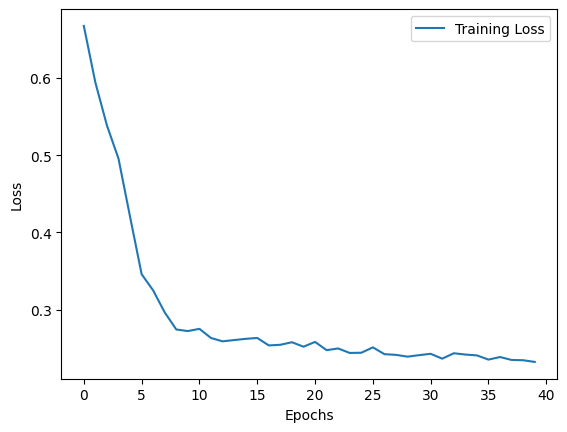

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Bước 7: Đánh giá mô hình
y_pred = model_smb.predict(X_smb_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Phân loại nhị phân
print("Accuracy:",metrics.accuracy_score(y_smb_test, y_pred_classes))
print("Precision:",metrics.precision_score(y_smb_test, y_pred_classes))
print("Recall:",metrics.recall_score(y_smb_test, y_pred_classes))
print("AUC:",metrics.roc_auc_score(y_smb_test, y_pred_classes))
print("F1:",metrics.f1_score(y_smb_test, y_pred_classes))

221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step
Accuracy: 0.9010895712466394
Precision: 0.9217261904761904
Recall: 0.8765921313331446
AUC: 0.9010861052817393
F1: 0.8985927752792688


In [ ]:
# Bước 4: Xây dựng mô hình LSTM với 4 lớp
model_smb0 = Sequential()

# Lớp LSTM thứ 1: 50 unit, dropout 0.3
model_smb0.add(LSTM(50, input_shape=(X_smb0_train.shape[1], X_smb0_train.shape[2]), return_sequences=True, activation='relu'))
model_smb0.add(Dropout(0.3))

# Lớp LSTM thứ 2: 100 unit, dropout 0.2
model_smb0.add(LSTM(100, return_sequences=True, activation='relu'))
model_smb0.add(Dropout(0.2))

# Lớp LSTM thứ 3: 150 unit, dropout 0.2
model_smb0.add(LSTM(150, return_sequences=True, activation='relu'))
model_smb0.add(Dropout(0.2))

# Lớp LSTM thứ 4: 200 unit, dropout 0.2
model_smb0.add(LSTM(200, return_sequences=False, activation='relu'))
model_smb0.add(Dropout(0.2))

# Lớp đầu ra với hàm sigmoid cho phân loại nhị phân
model_smb0.add(Dense(1, activation='sigmoid'))

# Bước 5: Biên dịch mô hình
optimizer = Adam(learning_rate=0.001)
model_smb0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Bước 6: Huấn luyện mô hình
history = model_smb0.fit(X_smb0_train, y_smb0_train, epochs=40, batch_size=1364)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - AUC: 0.6136 - Precision: 0.6631 - Recall: 0.3319 - accuracy: 0.5870 - loss: 0.6881
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - AUC: 0.7371 - Precision: 0.6361 - Recall: 0.8450 - accuracy: 0.6782 - loss: 0.6218
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - AUC: 0.8528 - Precision: 0.7645 - Recall: 0.7978 - accuracy: 0.7737 - loss: 0.4876
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - AUC: 0.8901 - Precision: 0.8139 - Recall: 0.8156 - accuracy: 0.8138 - loss: 0.4230
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - AUC: 0.9110 - Precision: 0.8611 - Recall: 0.8129 - accuracy: 0.8410 - loss: 0.3755
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - AUC: 0.9057 - Precision: 0.8745 - Recall: 0.7846 - accuracy: 0.8366 - loss: 0.3910
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - AUC: 0.9026 - Precision: 0.8457 - Recall: 0.8169 - accuracy: 0.8332 - loss: 0.4026
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - AUC

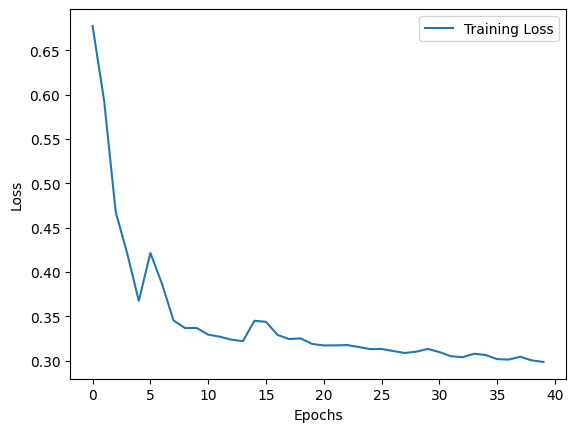

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Bước 7: Đánh giá mô hình
y_pred = model_smb0.predict(X_smb0_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Phân loại nhị phân
print("Accuracy:",metrics.accuracy_score(y_smb0_test, y_pred_classes))
print("Precision:",metrics.precision_score(y_smb0_test, y_pred_classes))
print("Recall:",metrics.recall_score(y_smb0_test, y_pred_classes))
print("AUC:",metrics.roc_auc_score(y_smb0_test, y_pred_classes))
print("F1:",metrics.f1_score(y_smb0_test, y_pred_classes))

221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step
Accuracy: 0.8688269421253715
Precision: 0.9269331585845347
Recall: 0.8007359184828757
AUC: 0.8688173084208379
F1: 0.8592255125284738


In [ ]:
# Bước 4: Xây dựng mô hình LSTM với 4 lớp
model_smb1 = Sequential()

# Lớp LSTM thứ 1: 50 unit, dropout 0.3
model_smb1.add(LSTM(50, input_shape=(X_smb1_train.shape[1], X_smb1_train.shape[2]), return_sequences=True, activation='relu'))
model_smb1.add(Dropout(0.3))

# Lớp LSTM thứ 2: 100 unit, dropout 0.2
model_smb1.add(LSTM(100, return_sequences=True, activation='relu'))
model_smb1.add(Dropout(0.2))

# Lớp LSTM thứ 3: 150 unit, dropout 0.2
model_smb1.add(LSTM(150, return_sequences=True, activation='relu'))
model_smb1.add(Dropout(0.2))

# Lớp LSTM thứ 4: 200 unit, dropout 0.2
model_smb1.add(LSTM(200, return_sequences=False, activation='relu'))
model_smb1.add(Dropout(0.2))

# Lớp đầu ra với hàm sigmoid cho phân loại nhị phân
model_smb1.add(Dense(1, activation='sigmoid'))

# Bước 5: Biên dịch mô hình
optimizer = Adam(learning_rate=0.001)
model_smb1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Bước 6: Huấn luyện mô hình
history = model_smb1.fit(X_smb1_train, y_smb1_train, epochs=40, batch_size=1364)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - AUC: 0.6271 - Precision: 0.4172 - Recall: 0.0856 - accuracy: 0.5347 - loss: 0.6823
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - AUC: 0.8221 - Precision: 0.7716 - Recall: 0.7529 - accuracy: 0.7641 - loss: 0.5744
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - AUC: 0.8476 - Precision: 0.7683 - Recall: 0.8119 - accuracy: 0.7814 - loss: 0.4844
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - AUC: 0.8861 - Precision: 0.8056 - Recall: 0.8251 - accuracy: 0.8136 - loss: 0.4949
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - AUC: 0.8561 - Precision: 0.7745 - Recall: 0.7590 - accuracy: 0.7631 - loss: 0.5041
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - AUC: 0.8984 - Precision: 0.7984 - Recall: 0.8661 - accuracy: 0.8225 - loss: 0.4354
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - AUC: 0.9193 - Precision: 0.8611 - Recall: 0.8264 - accuracy: 0.8475 - loss: 0.3658
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - AUC

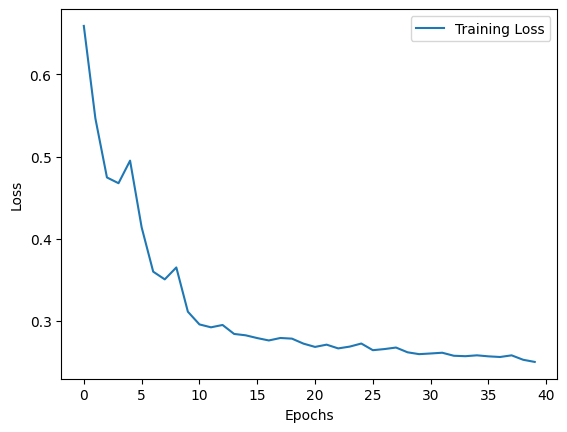

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Bước 7: Đánh giá mô hình
y_pred = model_smb1.predict(X_smb1_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Phân loại nhị phân
print("Accuracy:",metrics.accuracy_score(y_smb1_test, y_pred_classes))
print("Precision:",metrics.precision_score(y_smb1_test, y_pred_classes))
print("Recall:",metrics.recall_score(y_smb1_test, y_pred_classes))
print("AUC:",metrics.roc_auc_score(y_smb1_test, y_pred_classes))
print("F1:",metrics.f1_score(y_smb1_test, y_pred_classes))

241/241 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step
Accuracy: 0.8949421401638279
Precision: 0.9179966978536048
Recall: 0.8673946957878315
AUC: 0.8949457224062694
F1: 0.8919786096256684
